# Check COCO annotations with `pycocotools` &nbsp; [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/makinacorpus/geolabel-maker/blob/master/notebooks/Check%20COCO%20annotations%20with%20pycocotools.ipynb)

A tutorial provided by [Makina Corpus](https://makina-corpus.com/)  

The notebook will guide you on how to display and visualize the generated annotations. We will use ``pycocotools`` to visualize segmentation and object detection annotations.

## Set Up

As always, we will load the required packages to downlaod data. We will add ``geolabel_maker`` package to the path,
to make sure you can access its modules.  
As this notebook is available on google colaboratory, we need to load GDAL and other packages differently.

In [1]:
import sys
import os

RUN_ON_COLAB = False

# Check if its running from Colab
if "google.colab" in str(get_ipython()):
    RUN_ON_COLAB = True
    print("Running on Google Colab")
else:
    print("Running on Jupyter")

Running on Jupyter


### For Jupyter users

The following code will load packages for Notebook users. Keep in mind that GDAL and other packages must be installed.

In [2]:
if not RUN_ON_COLAB:
    sys.path.append("../")

### For Colab users

In [3]:
if RUN_ON_COLAB:
    !pip install pycocotools

### Import the packages

In [4]:
# Basic imports
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt

# PyCOCO tools
from pycocotools.coco import COCO

## Load the coco annotations

To load your annotations with `pycocotools`, provide the path to your annotations file.
You can generate such annotations file with Geolabel Maker. See [Generate annotations with Geolabel Maker](Generate%20annotations%20with%20Geolabel%20Maker.ipynb) notebook to get started.

In [5]:
coco = COCO("segmentation.json")

loading annotations into memory...
Done (t=0.10s)
creating index...
index created!


## Select annotations

Then, select the annotations associated to an image.
With ``pycocotools``, you need to select the image's id and then the annotations.

In [6]:
# Get images' id
image_ids = coco.getImgIds()
image_id = random.randint(0, len(image_ids) - 1)

# Show annotations for chosen image
annotation_ids = coco.getAnnIds(imgIds=[image_id])

if len(annotation_ids) == 0:
    print(f"There are no annotations for image's id {image_id}.")

## Load the segmentations

Once you have selected an image, you can load the annotations. An annotation should look like:

```json
{
    'segmentation': [[0.0,372.49,6.29,375.87,16.35,381.23,18.03,382.14,30.17,388.58,30.27,388.63,24.84,400.53,19.96,411.2,8.99,434.93,0.0,430.82,0.0,372.49]],
    'iscrowd': 1,
    'image_id': 0,
    'image_name': 'data\\mosaics\\images\\18\\1843_5173_08_CC46-tile_0x0.tif',
    'category_id': 0,
    'id': 0,
    'bbox': [0.0, 372.49, 30.27, 62.44],
    'area': 1135.59
}
```

In [7]:
annotations = coco.loadAnns(annotation_ids)

## Load the image

Then you have to load the image to visualize the segmentation map on top.

In [8]:
image_info = coco.loadImgs([image_id])[0]
filename = image_info["file_name"]
print(f"Loading '{filename}'")

image = Image.open(filename)
image_array = np.array(image)

Loading data\mosaics\images\18\1844_5173_08_CC46-tile_0x1000.tif


## Visualize the annotations

Finally, you can visualize the annotations. Plot first your image as a background, and then the segmentation.

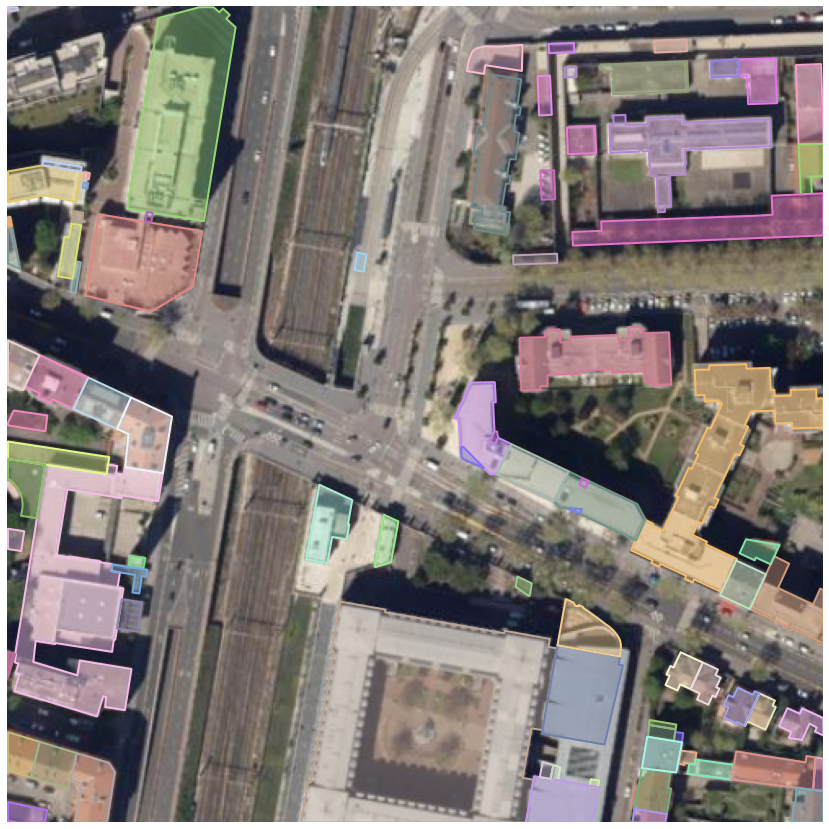

In [9]:
plt.figure(figsize=(15, 15))
plt.axis("off")
plt.imshow(image_array)
coco.showAnns(annotations, draw_bbox=False)